In [123]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import gym
sns.set(style='darkgrid')

In [2]:
r = readers.CollectionReader('../src/action_logging/agents')

100%|██████████| 32/32 [00:05<00:00,  6.18it/s]


In [ ]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [11]:
games =  [
    "Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
    "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2","InvertedDoublePendulum-v2"]
code_level_opts = {
      'clip_eps': [0.2],
      #'norm_rewards': ['none', 'returns'],
      'strict_action_bounds': [False, True],
      'adjust_init_std': [False, True],
      #'initialization': ['xavier', 'orthogonal']
}

NUM_BINS = 20

In [9]:
def filter_opts(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [106]:
idvars = ['game','opt_step']+list(code_level_opts.keys())
policy_stats = constraints.set_index(idvars)[
    filter(lambda c: 'mean' in c, constraints.columns)]
policy_stats = pd.melt(policy_stats.rename_axis('dimension', axis=1).reset_index(), id_vars=idvars).dropna()
policy_stats['mean_or_std'] = policy_stats.dimension.apply(lambda s: 'std' if 'std' in s else 'mean')
policy_stats['dimension'] = policy_stats.dimension.apply(lambda s: int(s.split('_')[-1]))

# Plots for no adjust init std, no strict action bounds

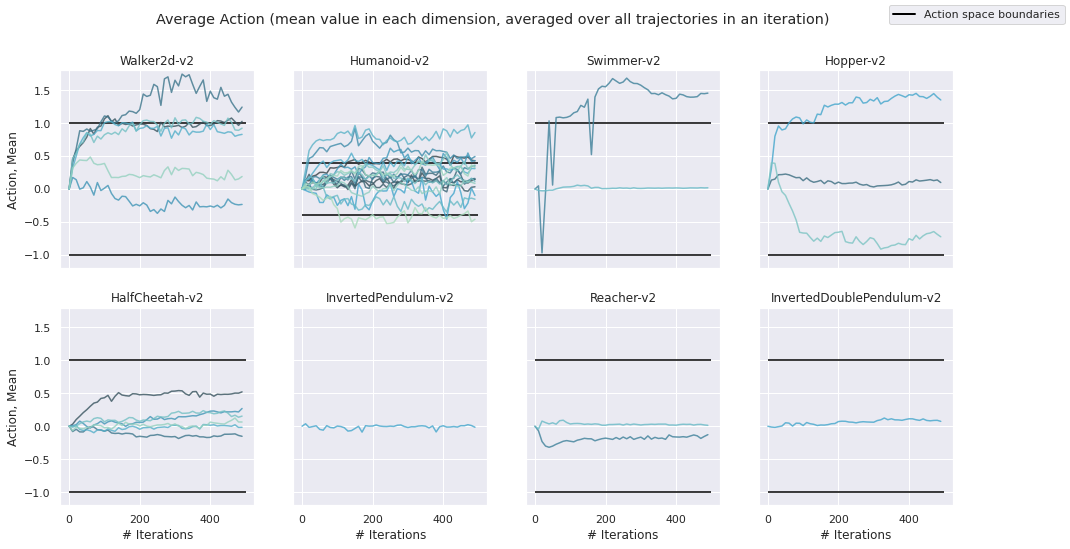

In [132]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8), sharex=True, sharey=True)


for j, g in enumerate(games):
    env = gym.make(g)
    low = env.action_space.low
    high = env.action_space.high
    filt = filter_opts(policy_stats, mean_or_std='mean', game=g,
                       strict_action_bounds=False, adjust_init_std=False)
    sns.lineplot(data=filt, x='opt_step', y='value', n_boot=100, hue='dimension',
                 ax=ax.flatten()[j], legend=False, alpha=0.8,
                 palette=sns.color_palette("GnBu_d", len(low)))
    # All action dimensions have the same bounds in MuJoCo
    ax.flatten()[j].hlines(low[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].hlines(high[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].set_title(g)
    ax.flatten()[j].set_ylim(-1.2, 1.8)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Action, Mean')
ax[1][0].set_ylabel('Action, Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Average Action (mean value in each dimension, averaged over all trajectories in an iteration)')

from matplotlib.lines import Line2D
blackline = Line2D([0], [0], color='black', lw=2, label='Action space boundaries')
fig.legend(handles=[blackline])

plt.show()

In [ ]:
# Plot setup
fig, ax = plt.subplots(1, 4, figsize=(13,4), sharex=True, sharey=True)


for j, g in enumerate(["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2"]):
    env = gym.make(g)
    low = env.action_space.low
    high = env.action_space.high
    filt = filter_opts(policy_stats, mean_or_std='mean', game=g,
                       strict_action_bounds=False, adjust_init_std=False)
    sns.lineplot(data=filt, x='opt_step', y='value', n_boot=100, hue='dimension',
                 ax=ax.flatten()[j], legend=False, alpha=0.8,
                 palette=sns.color_palette("GnBu_d", len(low)))
    # All action dimensions have the same bounds in MuJoCo
    ax.flatten()[j].hlines(low[0], 0, 500, colors='coral', linestyles='solid')
    ax.flatten()[j].hlines(high[0], 0, 500, colors='coral', linestyles='solid')
    ax.flatten()[j].set_title(g)
    ax.flatten()[j].set_ylim(-1.2, 1.8)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0].set_ylabel('Action, Mean')
for a in ax:
    a.set_xlabel('# Iterations')
fig.suptitle('Average Action from Gaussian Policy'
             ', trained on clipped action spaces', fontsize=14)

fig.subplots_adjust(top=0.75, right=0.85)

from matplotlib.lines import Line2D
blackline = Line2D([0], [0], color='coral', lw=2, label='Action space\nclipping bounds')
#fig.legend(handles=[blackline], loc='upper right')


darkblueline = Line2D([0], [0], color=sns.color_palette("GnBu_d", 3)[0],
                   lw=2, label='')
medblueline = Line2D([0], [0], color=sns.color_palette("GnBu_d", 3)[1],
                   lw=2, label='Action dimensions')
lightblueline = Line2D([0], [0], color=sns.color_palette("GnBu_d", 3)[2],
                   lw=2, label='')
fig.legend(handles=[blackline, lightblueline, medblueline, darkblueline], loc='center right')
fig.subplots_adjust(top=0.8, right=0.85)

plt.show()

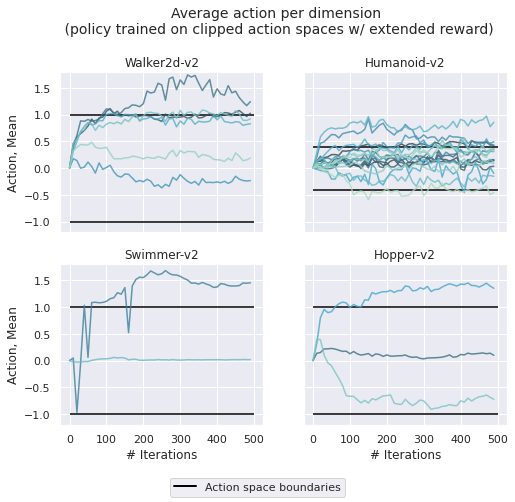

In [161]:
# Plot setup
fig, ax = plt.subplots(2, 2, figsize=(8,7), sharex=True, sharey=True)


for j, g in enumerate(["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2"]):
    env = gym.make(g)
    low = env.action_space.low
    high = env.action_space.high
    filt = filter_opts(policy_stats, mean_or_std='mean', game=g,
                       strict_action_bounds=False, adjust_init_std=False)
    sns.lineplot(data=filt, x='opt_step', y='value', n_boot=100, hue='dimension',
                 ax=ax.flatten()[j], legend=False, alpha=0.8,
                 palette=sns.color_palette("GnBu_d", len(low)))
    for 
    # All action dimensions have the same bounds in MuJoCo
    ax.flatten()[j].hlines(low[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].hlines(high[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].set_title(g)
    ax.flatten()[j].set_ylim(-1.2, 1.8)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Action, Mean')
ax[1][0].set_ylabel('Action, Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Average action per dimension'
             '\n (policy trained on clipped action spaces w/ extended reward)', fontsize=14)

from matplotlib.lines import Line2D
blackline = Line2D([0], [0], color='black', lw=2, label='Action space boundaries')
fig.legend(handles=[blackline], loc='lower center')
fig.subplots_adjust(top=0.85,bottom=0.15)

plt.show()

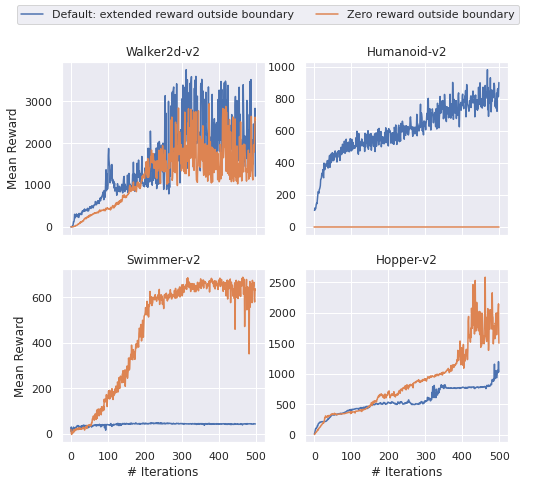

In [166]:
# Plot setup
fig, ax = plt.subplots(2, 2, figsize=(8,7), sharex=True, sharey=False)


for j, g in enumerate(["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2"]):
        filt = filter_opts(opt, game=g, strict_action_bounds=False, adjust_init_std=False)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], legend=False, label='Default: extended reward outside boundary')
        filt = filter_opts(opt, game=g, strict_action_bounds=True, adjust_init_std=False)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], legend=False, label='Zero reward outside boundary')
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_ylabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

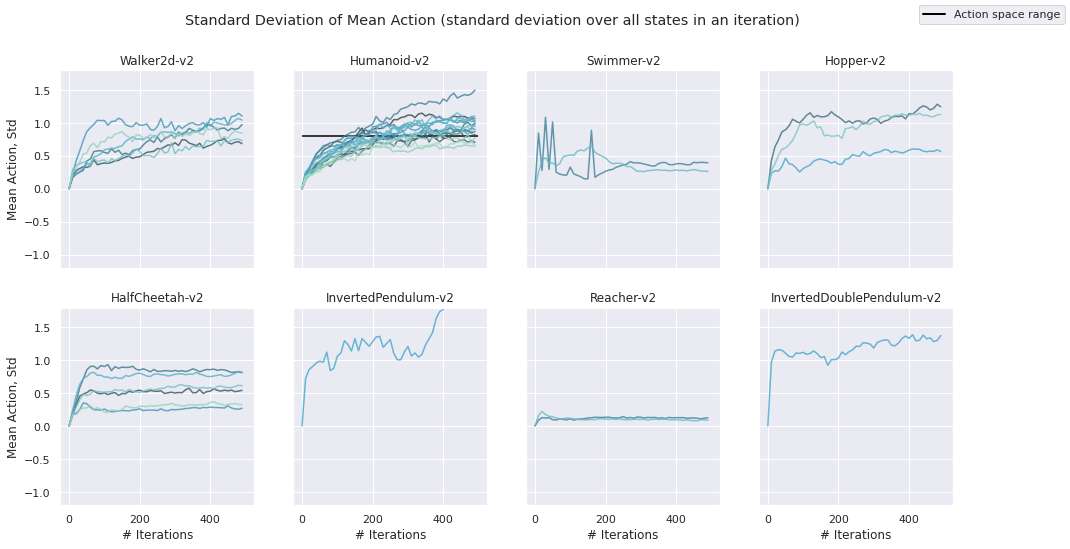

In [134]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8), sharex=True, sharey=True)


for j, g in enumerate(games):
    env = gym.make(g)
    low = env.action_space.low
    high = env.action_space.high
    filt = filter_opts(policy_stats, mean_or_std='std', game=g,
                       strict_action_bounds=False, adjust_init_std=False)
    sns.lineplot(data=filt, x='opt_step', y='value', n_boot=100, hue='dimension',
                 ax=ax.flatten()[j], legend=False, alpha=0.8,
                 palette=sns.color_palette("GnBu_d", len(low)))
    # All action dimensions have the same bounds in MuJoCo
    ax.flatten()[j].hlines(high[0]-low[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].set_title(g)
    ax.flatten()[j].set_ylim(-1.2, 1.8)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Action, Std')
ax[1][0].set_ylabel('Mean Action, Std')
for a in ax[1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Standard Deviation of Mean Action (standard deviation over all states in an iteration)')

from matplotlib.lines import Line2D
blackline = Line2D([0], [0], color='black', lw=2, label='Action space range')
fig.legend(handles=[blackline])

plt.show()

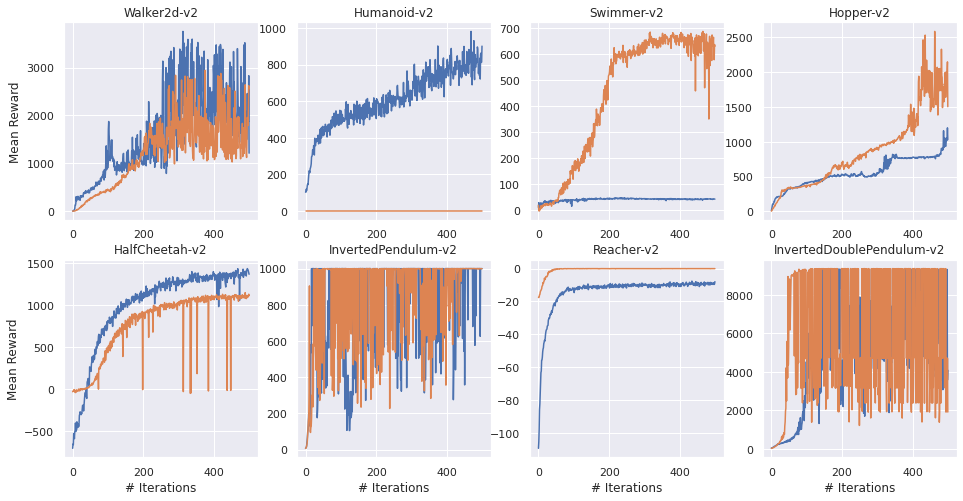

In [152]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_opts(opt, game=g, strict_action_bounds=False, adjust_init_std=False)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], legend=False, label='Extended reward outside boundary')
        filt = filter_opts(opt, game=g, strict_action_bounds=True, adjust_init_std=False)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], legend=False, label='Zero reward outside boundary')
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_ylabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')

plt.show()

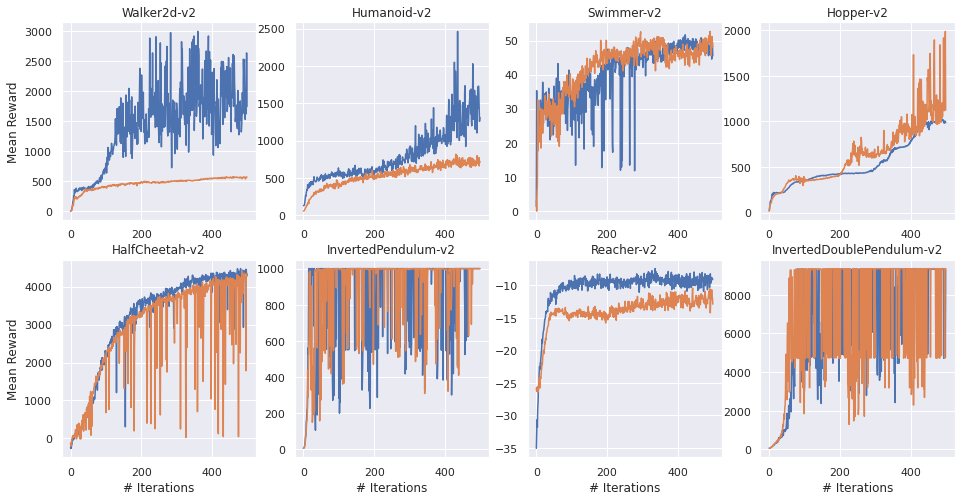

In [167]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_opts(opt, game=g, strict_action_bounds=False, adjust_init_std=True)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], legend=False, label='Extended reward outside boundary')
        filt = filter_opts(opt, game=g, strict_action_bounds=True, adjust_init_std=True)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], legend=False, label='Zero reward outside boundary')
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_ylabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')

plt.show()

# Plots for no adjust init std, strict action bounds

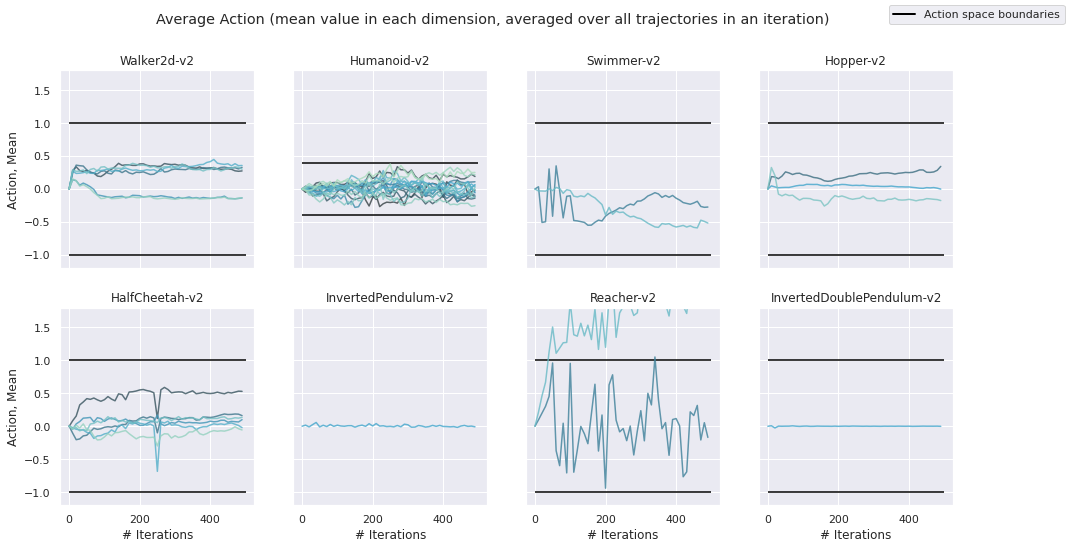

In [146]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8), sharex=True, sharey=True)


for j, g in enumerate(games):
    env = gym.make(g)
    low = env.action_space.low
    high = env.action_space.high
    filt = filter_opts(policy_stats, mean_or_std='mean', game=g,
                       strict_action_bounds=True, adjust_init_std=False)
    sns.lineplot(data=filt, x='opt_step', y='value', n_boot=100, hue='dimension',
                 ax=ax.flatten()[j], legend=False, alpha=0.8,
                 palette=sns.color_palette("GnBu_d", len(low)))
    # All action dimensions have the same bounds in MuJoCo
    ax.flatten()[j].hlines(low[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].hlines(high[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].set_title(g)
    ax.flatten()[j].set_ylim(-1.2, 1.8)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Action, Mean')
ax[1][0].set_ylabel('Action, Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Average Action (mean value in each dimension, averaged over all trajectories in an iteration)')

from matplotlib.lines import Line2D
blackline = Line2D([0], [0], color='black', lw=2, label='Action space boundaries')
fig.legend(handles=[blackline])

plt.show()

# Plots for no adjust init std, strict action bounds

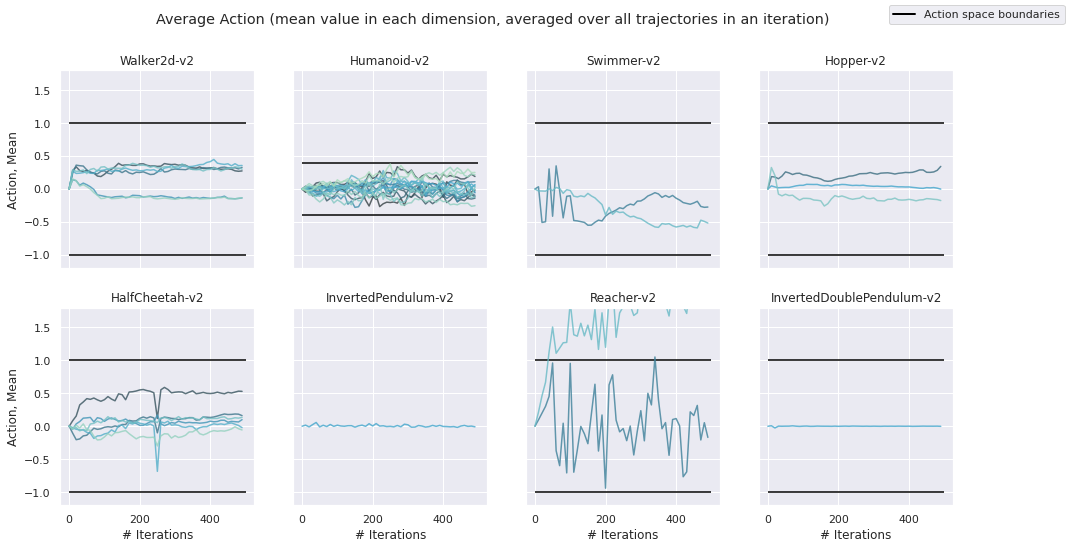

In [146]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8), sharex=True, sharey=True)


for j, g in enumerate(games):
    env = gym.make(g)
    low = env.action_space.low
    high = env.action_space.high
    filt = filter_opts(policy_stats, mean_or_std='mean', game=g,
                       strict_action_bounds=True, adjust_init_std=False)
    sns.lineplot(data=filt, x='opt_step', y='value', n_boot=100, hue='dimension',
                 ax=ax.flatten()[j], legend=False, alpha=0.8,
                 palette=sns.color_palette("GnBu_d", len(low)))
    # All action dimensions have the same bounds in MuJoCo
    ax.flatten()[j].hlines(low[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].hlines(high[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].set_title(g)
    ax.flatten()[j].set_ylim(-1.2, 1.8)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Action, Mean')
ax[1][0].set_ylabel('Action, Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Average Action (mean value in each dimension, averaged over all trajectories in an iteration)')

from matplotlib.lines import Line2D
blackline = Line2D([0], [0], color='black', lw=2, label='Action space boundaries')
fig.legend(handles=[blackline])

plt.show()

# Plots for adjust init std, no strict action bounds

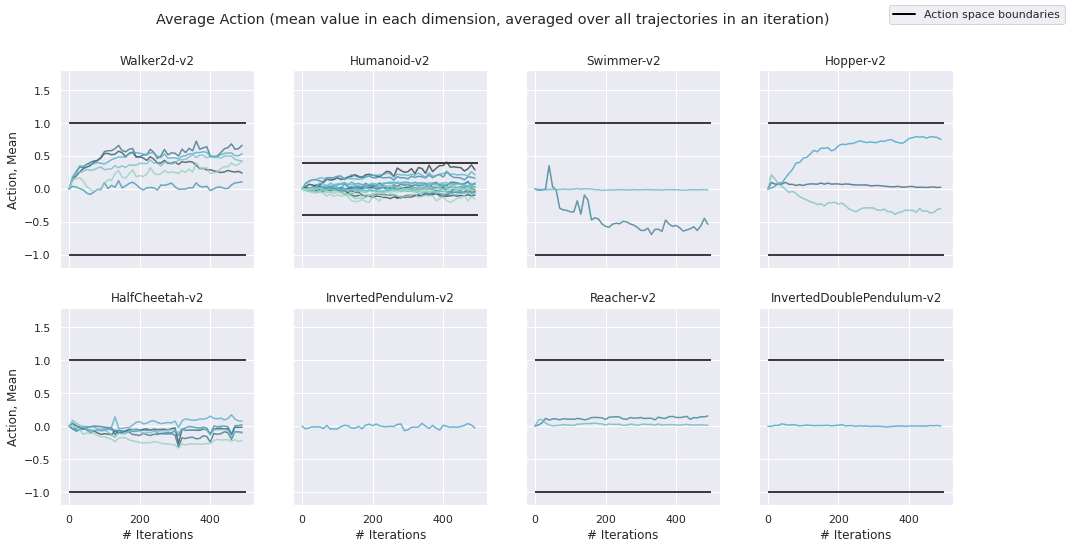

In [147]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8), sharex=True, sharey=True)


for j, g in enumerate(games):
    env = gym.make(g)
    low = env.action_space.low
    high = env.action_space.high
    filt = filter_opts(policy_stats, mean_or_std='mean', game=g,
                       strict_action_bounds=False, adjust_init_std=True)
    sns.lineplot(data=filt, x='opt_step', y='value', n_boot=100, hue='dimension',
                 ax=ax.flatten()[j], legend=False, alpha=0.8,
                 palette=sns.color_palette("GnBu_d", len(low)))
    # All action dimensions have the same bounds in MuJoCo
    ax.flatten()[j].hlines(low[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].hlines(high[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].set_title(g)
    ax.flatten()[j].set_ylim(-1.2, 1.8)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Action, Mean')
ax[1][0].set_ylabel('Action, Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Average Action (mean value in each dimension, averaged over all trajectories in an iteration)')

from matplotlib.lines import Line2D
blackline = Line2D([0], [0], color='black', lw=2, label='Action space boundaries')
fig.legend(handles=[blackline])

plt.show()

# Plots for adjust init std, strict action bounds

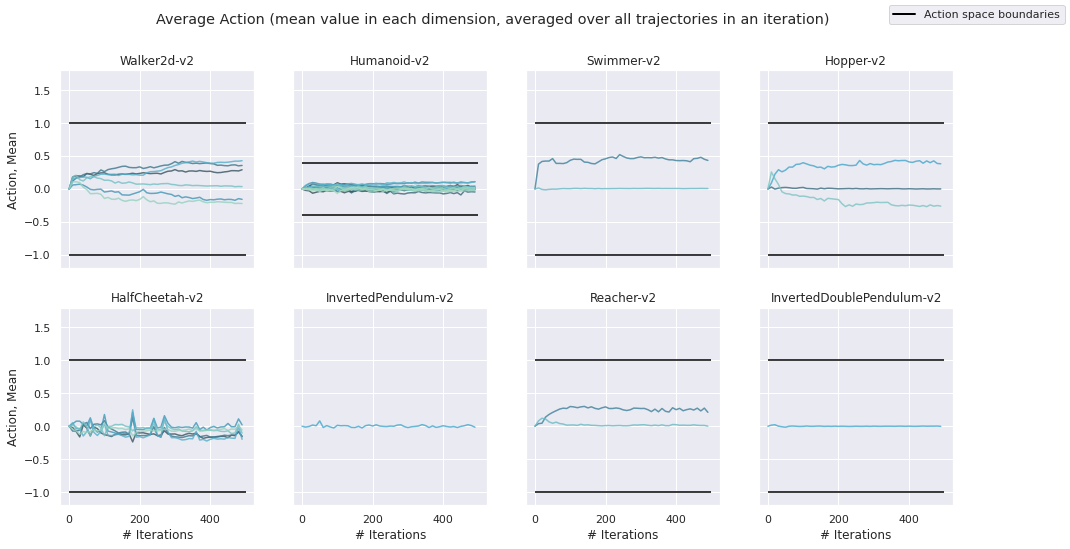

In [148]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8), sharex=True, sharey=True)


for j, g in enumerate(games):
    env = gym.make(g)
    low = env.action_space.low
    high = env.action_space.high
    filt = filter_opts(policy_stats, mean_or_std='mean', game=g,
                       strict_action_bounds=True, adjust_init_std=True)
    sns.lineplot(data=filt, x='opt_step', y='value', n_boot=100, hue='dimension',
                 ax=ax.flatten()[j], legend=False, alpha=0.8,
                 palette=sns.color_palette("GnBu_d", len(low)))
    # All action dimensions have the same bounds in MuJoCo
    ax.flatten()[j].hlines(low[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].hlines(high[0], 0, 500, colors='black', linestyles='solid')
    ax.flatten()[j].set_title(g)
    ax.flatten()[j].set_ylim(-1.2, 1.8)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Action, Mean')
ax[1][0].set_ylabel('Action, Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')
fig.suptitle('Average Action (mean value in each dimension, averaged over all trajectories in an iteration)')

from matplotlib.lines import Line2D
blackline = Line2D([0], [0], color='black', lw=2, label='Action space boundaries')
fig.legend(handles=[blackline])

plt.show()

# Plots for no adjust init std, no strict action bounds

In [ ]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_opts(constraints, game=g)
        for d in range(17):
            sns.lineplot(filt.opt_step, filt[f'mean_{d}'], n_boot=100,
                         ax=ax.flatten()[j], legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Policy Mean')
ax[1][0].set_ylabel('Policy Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')

plt.show()

In [3]:
r = readers.CollectionReader('../src/log_action/agents')

100%|██████████| 8/8 [00:01<00:00,  6.66it/s]


In [ ]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [6]:
games =  [
    "Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
    "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2","InvertedDoublePendulum-v2"]
code_level_opts = {
      'clip_advantages': [0.2],
      #'norm_rewards': ['none', 'returns'],
      #'anneal_lr': [False, True],
      #'value_clipping': [False, True],
      #'initialization': ['xavier', 'orthogonal']
}

NUM_BINS = 20

In [7]:
metadata['kl_penalty'] = (metadata['kl_penalty_coeff'] > 0)
metadata['clip'] = (metadata['clip_eps'] < 1)
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

In [8]:
def filter_opts(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [10]:
constraints.game.unique()

array(['Humanoid-v2', 'Walker2d-v2', 'Swimmer-v2', 'Hopper-v2',
       'HalfCheetah-v2', 'Reacher-v2'], dtype=object)

# Plot Policy Mean in each dimension

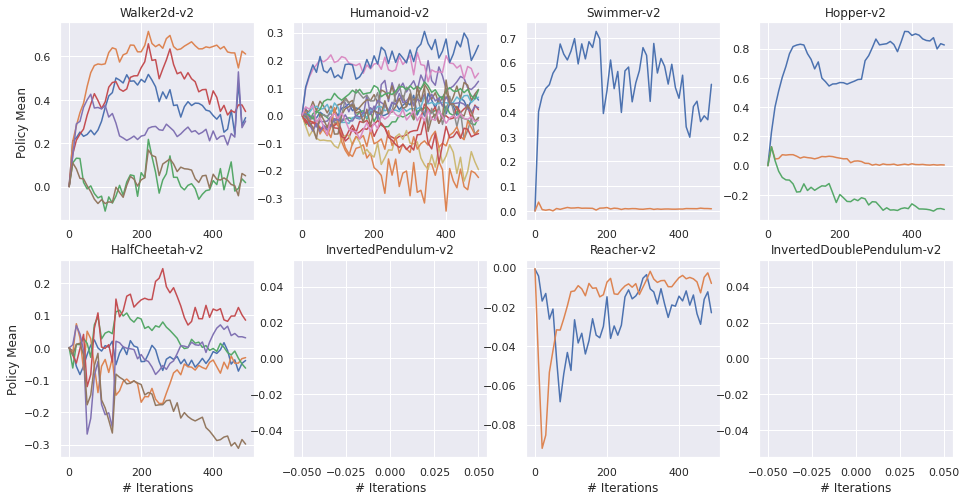

In [19]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_opts(constraints, game=g)
        for d in range(17):
            sns.lineplot(filt.opt_step, filt[f'mean_{d}'], n_boot=100,
                         ax=ax.flatten()[j], legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Policy Mean')
ax[1][0].set_ylabel('Policy Mean')
for a in ax[1]:
    a.set_xlabel('# Iterations')

plt.show()

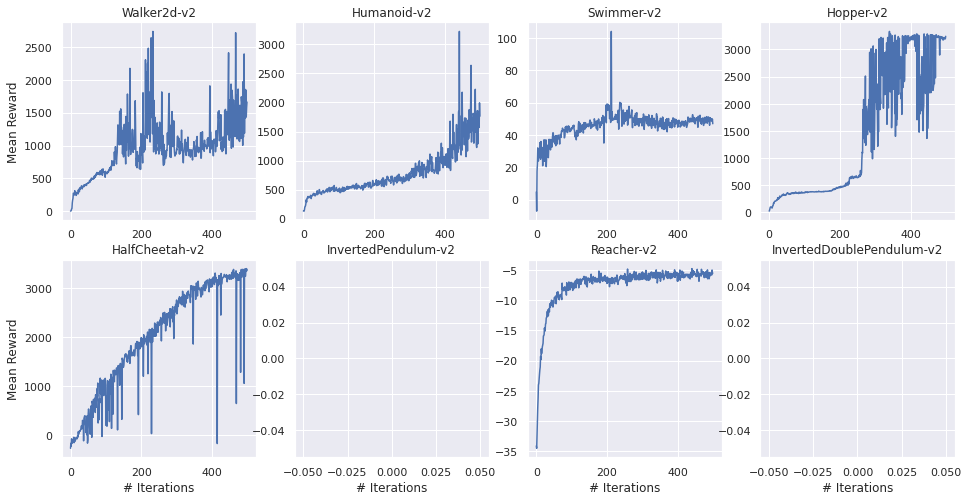

In [21]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_opts(opt, game=g)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_ylabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')

plt.show()